# Practical 2: Hypothesis Testing
## Background
In this activity, we learn how hypothesis testing works. As you know, a hypothesis test is checking whether or not a certain statement or prediction about a population is correct. These statements are called hypotheses.

## Steps for Practical 2:
<ul>
    <li> Use hypothesis test to check a single proportion. </li>
    <li> Use hypothesis test to check a single mean. </li>
    <li> Hypothesis test on correlation.</li>
    <li> Use hypothesis test to compare means. </li>
    <li> Use hypothesis test to compare paired means.</li>
    <li> Use hypothesis test to compare proportions.</li>
</ul>

### We use the following commands defined in R to achieve the above goals.  
1. Single proportion Hypothesis test __prop.test()__
2. Single mean Hypothesis test  __t.test()__
3. Hypothesis test on correlation __cor.test()__
4. Comparing means from two independent group __t.test()__
5. Comparing paired means __t.test()__
6. Comparing proportions, __prop.test()__

## 1. Single proportion: Hypothesis test and confidence interval

$
  \begin{cases}
    H_0: p=0.5       & \quad \text{Null Hypothesis}\\
    H_A: p\neq 0.5   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

## Example
In 162 tosses we get 98 heads. Is this significantly greater than 50%? Note that we use prop.test() command for single proportion. We need to specify the status of an alternative hypothesis. There are three options for that. It must be one of "two.sided" (default), "greater" or "less". 

In [52]:
# 98 heads out of 162 trials (default settings)
prop.test(98, 162) #test here is for if it is different. it is two-sided.


	1-sample proportions test with continuity correction

data:  98 out of 162, null probability 0.5
X-squared = 6.7222, df = 1, p-value = 0.009522
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5249531 0.6798650
sample estimates:
        p 
0.6049383 


## Reflection
* pay attention to the p-value
* the significance level is $\alpha= 0.05$. This is the default.
* note that the p-value is 0.009522. The p_value is less than $\alpha$. Hence, we reject the null.
* there is 95% confidence interval as well $[0.5249531, 0.6798650]$
* also, the sample estimate for the proportion $\hat{p}=0.6049383$

#### Can you investigate what is the command of $prop.test()$ in R?

* you can choose two-sided or one-sided test using alternative
* you can assign any confidence level
* search for ?t.test for more info

In the following example,  we need to change the default string of alternative which was “two.sided” to “greater”. 

$
  \begin{cases}
    H_0: p=0.5       & \quad \text{Null Hypothesis}\\
    H_A: p > 0.5   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

In [53]:
# One-tailed test with 90% CI
prop.test(98, 162, alt = "greater", conf.level = .90)


	1-sample proportions test with continuity correction

data:  98 out of 162, null probability 0.5
X-squared = 6.7222, df = 1, p-value = 0.004761
alternative hypothesis: true p is greater than 0.5
90 percent confidence interval:
 0.5517784 1.0000000
sample estimates:
        p 
0.6049383 


As seen, because the p-value of 0.004761 is less than 0.05, the null hypothesis is rejected. 

## 2. Single mean: Hypothesis test and confidence interval
The built-in quakes dataset is used in this example. The quakes dataset includes the locations of earthquakes of Fiji. It gives the locations of 1000 seismic events of MB>4.0. The events occurred in a cube near Fiji since 1964. 
    
	
We use the “mag” feature which is the magnitude of earthquakes in this example. 


$
  \begin{cases}
    H_0: \mu=0       & \quad \text{Null Hypothesis}\\
    H_A: \mu \neq 0   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

t-test should be used for one-sample (single). The default of mean in t-test ) is zero. Note that the default status for alternative is “two.sided”. 

In [55]:
#?quakes to see what the data are
mag <- quakes$mag 

#### The following command tests the null hypothesis which is the mean of the magnitude of earthquakes against the alternative which is “two.sided” (i.e. not equal)

In [57]:
t.test(mag)


	One Sample t-test

data:  mag
t = 362.76, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.595406 4.645394
sample estimates:
mean of x 
   4.6204 


* get the p-value
* $\alpha=0.05$, because it is not mentioned
* the null is rejected as p-value is less than $\alpha$, which is 0.05.
* 95% confidence level for the mean is $[4.595406, 4.645394]$ 
* you can check the sample mean $\bar{x}=4.6204 $

Note that we have access to the value of the outputs of the t.test() function by using the following command in R. 

In [58]:
T <- t.test(mag)
names(T)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

Lets describe a little bit more about the above command. 

Note that the values are in a structure containing the following components: 
<ul> 
    <li> $statistic:$	the value of the t-statistic.</li>
    <li> $parameter:$	the degrees of freedom for the t-statistic. </li>
    <li> $p.value:$	the p-value for the test.</li>
    <li> $conf.int:$	a confidence interval for the mean appropriate to the specified alternative hypothesis.</li>
    <li> $estimate:$	the estimated mean or difference in means depending on whether it was a one-sample test or a two-sample test.</li>
    <li> $null.value:$	the specified hypothesized value of the mean or mean difference depending on whether it was a one-sample test or a two-sample test. </li>
    <li> $alternative:$	a character string describing the alternative hypothesis.</li>
    <li> $method:$	a character string indicating what type of t-test was performed.</li>
    <li> $data.name:$	a character string giving the name(s) of the data.</li>
</ul>

In [59]:
T$p.value

[1] 0

In [60]:
T$parameter

df 
999

In [61]:
T$conf.int

[1] 4.595406 4.645394
attr(,"conf.level")
[1] 0.95

## Example:
Perform the test for
$
  \begin{cases}
    H_0: \mu=4       & \quad \text{Null Hypothesis}\\
    H_A: \mu > 4   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

for mag data.

In [62]:
# One-sided t-test
t.test(mag, alternative = "greater", mu = 4)


	One Sample t-test

data:  mag
t = 48.709, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 4
95 percent confidence interval:
 4.59943     Inf
sample estimates:
mean of x 
   4.6204 


As seen, the p-value is less than 0.05, hence the null hypothesis is rejected against “greater” status.

# 3. Hypothesis test on correlation
The built-in Swiss dataset is used for this example. The dataset includes Swiss fertility and socioeconomic indicators for each of 47 French-speaking provinces of Switzerland at around 1888.
	
We focus on Fertility and Education features of this dataset. 

you may want to get a hypothesis test or a confidence interval, the basic inferential statistics for the correlations. R has a built-in function called __cor.test__ that can do this for one pair of variables at a time.

$
  \begin{cases}
    H_0: \rho=0       & \quad \text{Null Hypothesis}\\
    H_A: \rho \neq 0   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

Have a look at swiss data in R by using ?swiss. We want to test for correlation between swissFertility  and  swissEducation. We want to see if the correlation between them is zero or not.

In [1]:
cor.test(swiss$Fertility, swiss$Education)


	Pearson's product-moment correlation

data:  swiss$Fertility and swiss$Education
t = -5.9536, df = 45, p-value = 3.659e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7987075 -0.4653206
sample estimates:
       cor 
-0.6637889 


* p-value is almost zero. So, we reject the Null. There is some correlation between the two variables.
* the sample correlation is -0.6637889.
* 95 percent confidence interval: $[-0.7987075, -0.4653206]$

# 4. Comparing means with the t-test
The built-in Student’s Sleep dataset is used for this example.

Please run ?sleep and explore the dataset first. 

The following test is a two-sample t-test. It compares the means of two different groups.

$
  \begin{cases}
    H_0: \mu_1 - \mu_2=0       & \quad \text{Null Hypothesis}\\
    H_A: \mu_1 - \mu_2 \neq 0   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

Warning message in par(oldpar):
"graphical parameter "cin" cannot be set"Warning message in par(oldpar):
"graphical parameter "cra" cannot be set"Warning message in par(oldpar):
"graphical parameter "csi" cannot be set"Warning message in par(oldpar):
"graphical parameter "cxy" cannot be set"Warning message in par(oldpar):
"graphical parameter "din" cannot be set"Warning message in par(oldpar):
"graphical parameter "page" cannot be set"

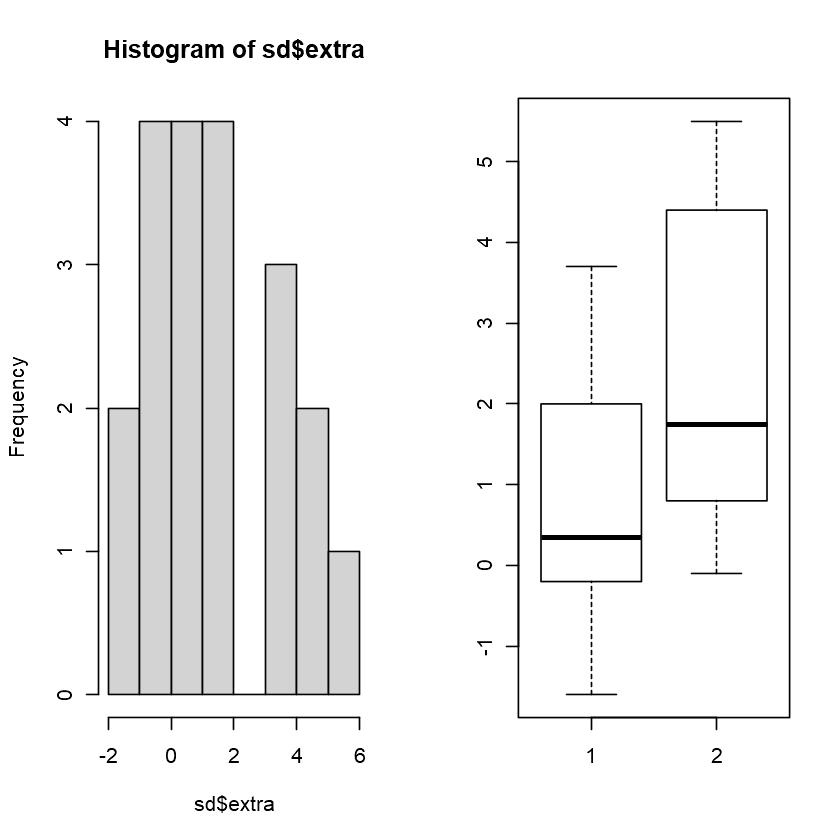

In [65]:
oldpar <- par()
sd <- sleep[, 1:2]  # Save just the first two variables
par(mfrow=c(1,2))

# Some quick plots to check data
hist(sd$extra, col = "lightgray")
boxplot(extra ~ group, data = sd)
par(oldpar)

In [66]:
# Independent 2-group t-test (with defaults)
t.test(extra ~ group, data = sd)


	Welch Two Sample t-test

data:  extra by group
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


As seen, the p-value is NOT less than 0.05. What does it mean? Do you agree the test could not reject the null hypothesis against the alternative one? 

### Now, let's try “less” status for the alternative. 

$
  \begin{cases}
    H_0: \mu_1 - \mu_2=0       & \quad \text{Null Hypothesis}\\
    H_A: \mu_1 - \mu_2 \le 0   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

Note that the confidence interval is considered 80% here, compared with that of 95%.

In [67]:
# t-test with options
t.test(extra ~ group,
       data = sd,
       alternative = "less",  # One-tailed test
       conf.level = 0.80)  # 80% CI (vs. 95%)


	Welch Two Sample t-test

data:  extra by group
t = -1.8608, df = 17.776, p-value = 0.0397
alternative hypothesis: true difference in means is less than 0
80 percent confidence interval:
       -Inf -0.8478191
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


What is your observation for the above information? 

In [68]:
# Create two groups of random data in separate variables
# Good because actual difference is known
x <- rnorm(30, mean = 20, sd = 5)
y <- rnorm(30, mean = 22, sd = 5)
t.test(x, y)


	Welch Two Sample t-test

data:  x and y
t = -1.5968, df = 56.571, p-value = 0.1159
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.8228587  0.5439726
sample estimates:
mean of x mean of y 
 19.47920  21.61864 


# 5. Comparing means: Paired and Unpaired t.test
In comparing means, we need to be careful regarding whether the two samples are independent or dependent. In case of dependent data, which is generally the data come from before and after a particular effect, we have a paired t.test(). For this kind of test, the size of the first sample should be the same as the second sample. In an unpaired test, the two samples do not need to have the same size. They are data regarding different groups. For example, if we record weights of people before and after taking a particular diet, then we are dealing with the same people, and we are doing paired test. However, if in a classroom if we compare their reading and writing skills, even though we have the same people, but it is not the case of before and after effect. Therefore, we are dealing with unpaired test. 

Here we generate two random samples. Think t1 is a normally distributed dataset with the mean of 52, and the sd of 6. We want to compare this with a sample of normally distributed data with mean 6 and sd of 12. We want to see if their difference of their means is zero or not.

Warning message in par(oldpar):
"graphical parameter "cin" cannot be set"Warning message in par(oldpar):
"graphical parameter "cra" cannot be set"Warning message in par(oldpar):
"graphical parameter "csi" cannot be set"Warning message in par(oldpar):
"graphical parameter "cxy" cannot be set"Warning message in par(oldpar):
"graphical parameter "din" cannot be set"Warning message in par(oldpar):
"graphical parameter "page" cannot be set"

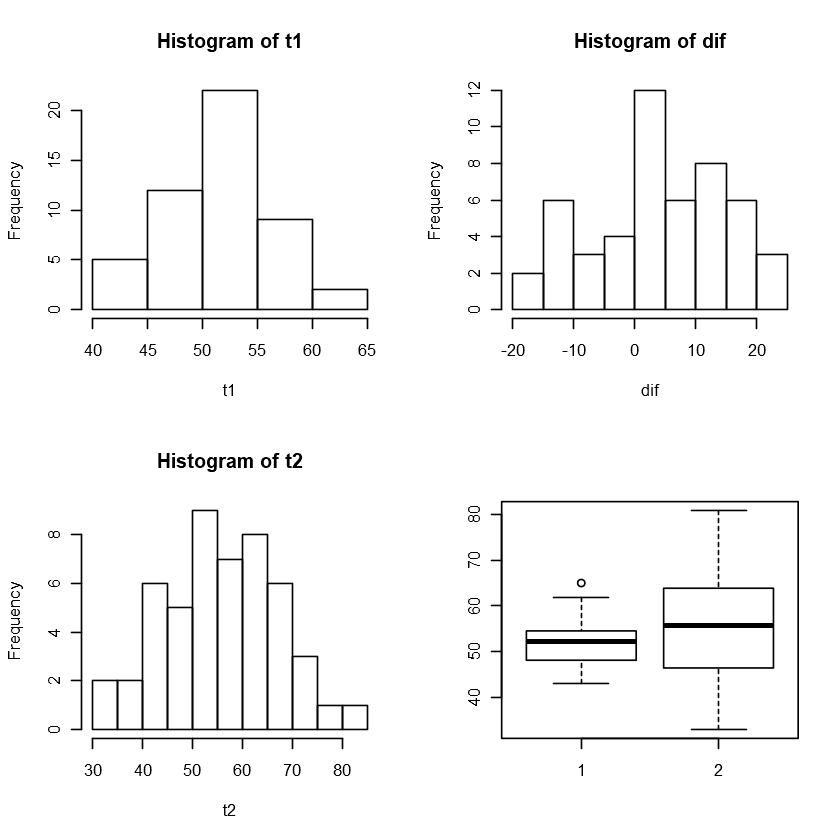

In [69]:
# Create random data
t1 <- rnorm(50, mean = 52, sd = 6)  # Time 1
dif <- rnorm(50, mean = 6, sd = 12)  # Difference
t2 <- t1 + dif  # Time 2

# Some quick plots to check data
par(mfrow=c(2,2))
hist(t1)
hist(dif)
hist(t2)
boxplot(t1, t2)
par(oldpar)

In [70]:
# Paired t-test (with defaults)
t.test(t2, t1, paired = TRUE)


	Paired t-test

data:  t2 and t1
t = 2.5642, df = 49, p-value = 0.01346
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8601461 7.0934831
sample estimates:
mean of the differences 
               3.976815 


In [71]:
# Paired t-test with options
t.test(t2, t1, 
       paired = TRUE,
       mu = 6,  # Specify non-0 null value
       alternative = "greater",  # One-tailed test
       conf.level = 0.99)  # 99% CI (vs. 95%)


	Paired t-test

data:  t2 and t1
t = -1.3045, df = 49, p-value = 0.9009
alternative hypothesis: true difference in means is greater than 6
99 percent confidence interval:
 0.2470461       Inf
sample estimates:
mean of the differences 
               3.976815 


## 6.  Comparing proportions
to compare the proportions of several different groups

In [72]:
# Need two vectors:
# One specifies the total number of people in each group
# This creates a vector with 5 100s in it, for 5 groups
# Same as "number of trials"
n5 <- c(rep(100, 5))
# Another specifies the number of people who are in category
# Same as "number of successes"
x5 <- c(65, 60, 60, 50, 45)
prop.test(x5, n5)


	5-sample test for equality of proportions without continuity
	correction

data:  x5 out of n5
X-squared = 10.958, df = 4, p-value = 0.02704
alternative hypothesis: two.sided
sample estimates:
prop 1 prop 2 prop 3 prop 4 prop 5 
  0.65   0.60   0.60   0.50   0.45 


In [73]:
# If there are only two groups, then it gives a confidence
# interval for the difference between the groups; 
# the default CI is .95
n2 <- c(40, 40)  # Number of trials
x2 <- c(30, 20)  # Number of successes
prop.test(x2, n2, conf.level = .80)


	2-sample test for equality of proportions with continuity correction

data:  x2 out of n2
X-squared = 4.32, df = 1, p-value = 0.03767
alternative hypothesis: two.sided
80 percent confidence interval:
 0.09097213 0.40902787
sample estimates:
prop 1 prop 2 
  0.75   0.50 
